<a href="https://colab.research.google.com/github/Gabuni19/GabUni--Codigos-cpp/blob/main/Metodo_de_Newton_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
x,y = sp.var("x y")

f = -sp.sin(x*y)+sp.cos(x-y)

In [18]:
f = sp.sin(x*y)-sp.cos(x-y)
f

sin(x*y) - cos(x - y)

In [19]:
fx = sp.diff(f,x)
fx

y*cos(x*y) + sin(x - y)

In [36]:
#Derivadas parciales de fx
fxx = sp.diff(fx,x)
fxy = sp.diff(fx,y)

In [34]:
fxx

-y**2*sin(x*y) + cos(x - y)

In [35]:
fxy

-x*y*sin(x*y) + cos(x*y) - cos(x - y)

In [32]:
fy = sp.diff(f,y)
fy

x*cos(x*y) - sin(x - y)

In [37]:
#Derivadas parciales de fy
fyx = sp.diff(fy,x)
fyy = sp.diff(fy,y)

#Derivadas parciales de fx
fxx = sp.diff(fx,x)
fxy = sp.diff(fx,y)

In [28]:
grad_f = sp.Matrix([ fx , fy ])
grad_f

Matrix([
[y*cos(x*y) + sin(x - y)],
[x*cos(x*y) - sin(x - y)]])

In [29]:
H = sp.Matrix([[fxx,fxy],
               [fyx,fyy]
               ])

In [30]:
H

Matrix([
[          -y**2*sin(x*y) + cos(x - y), -x*y*sin(x*y) + cos(x*y) - cos(x - y)],
[-x*y*sin(x*y) + cos(x*y) - cos(x - y),           -x**2*sin(x*y) + cos(x - y)]])

In [157]:
Hessian = sp.hessian(f, (x, y))
Hessian

Matrix([
[          -y**2*sin(x*y) + cos(x - y), -x*y*sin(x*y) + cos(x*y) - cos(x - y)],
[-x*y*sin(x*y) + cos(x*y) - cos(x - y),           -x**2*sin(x*y) + cos(x - y)]])

In [159]:
T =sp.MatMul( Hessian,grad_f)
T

Matrix([
[          -y**2*sin(x*y) + cos(x - y), -x*y*sin(x*y) + cos(x*y) - cos(x - y)],
[-x*y*sin(x*y) + cos(x*y) - cos(x - y),           -x**2*sin(x*y) + cos(x - y)]])*Matrix([
[y*cos(x*y) + sin(x - y)],
[x*cos(x*y) - sin(x - y)]])

In [165]:
Hessian*grad_f

Matrix([
[(x*cos(x*y) - sin(x - y))*(-x*y*sin(x*y) + cos(x*y) - cos(x - y)) + (y*cos(x*y) + sin(x - y))*(-y**2*sin(x*y) + cos(x - y))],
[(x*cos(x*y) - sin(x - y))*(-x**2*sin(x*y) + cos(x - y)) + (y*cos(x*y) + sin(x - y))*(-x*y*sin(x*y) + cos(x*y) - cos(x - y))]])

In [ ]:
H.inv().subs([(x,0),(y,0)]).evalf()

Matrix([
[1.0,   0],
[  0, 1.0]])

In [217]:
import numpy as np
import pandas as pd

def AgregarValues(d,x,y,Hx,Hy,H):
  d["x"].append(x)
  d["y"].append(y)
  d["Hx"].append(Hx)
  d["Hy"].append(Hy)
  d["H"].append(H)

def MetodoNewton(f,x_ini,y_ini,n_iter=1500, epsilon = 0.000001):
  values = {
      "x" : [],
      "y" : [],
      "Hx":[],
      "Hy":[],
      "H" :[]
  }

  fx = sp.diff(f,x)
  fy = sp.diff(f,y)
  H =  sp.hessian(f, (x, y))
  m = x_ini
  n = y_ini
  i=0

  while i < n_iter:
    m_current = m
    n_current = n

    Hess = H.subs([(x,m),(y,n)]).evalf().inv().evalf()
    grad_f = sp.Matrix([ fx , fy ])
    grad_f_evaluated = grad_f.subs([(x,m),(y,n)]).evalf()

    HG = Hess*grad_f_evaluated

    Hx = HG[0]
    Hy = HG[1]

    AgregarValues(values,float(m),float(n),float(Hx),float(Hy),Hess)

    m = m - Hx
    n = n - Hy


    if(np.abs(m_current-m) < epsilon and np.abs(n_current-n)< epsilon):
      AgregarValues(values,float(m),float(n),0,0,Hess)
      return m,n,values
    i+=1
  return m,n,values

In [223]:
import sympy as sp
x,y = sp.var("x y")
f = sp.sin(x*y)-sp.cos(x-y)
# f = 40/(x*y*z) + 40y*z + 10x*y + 20x*z

m,n,values = MetodoNewton(f,-2,-2)
values = pd.DataFrame(values)

In [224]:
values

,x,y,Hx,Hy,H
0,-2.000000,-2.000000,2.420554e-01,2.420554e-01,"[0.280999459472157, -0.0958408939715943, -0.09..."
1,-2.242055,-2.242055,-7.025288e-02,-7.025288e-02,"[0.346388455748846, -0.245071462044687, -0.245..."
2,-2.171803,-2.171803,-9.981058e-04,-9.981058e-04,"[0.303522347303939, -0.197564341840184, -0.197..."
3,-2.170804,-2.170804,-6.823188e-07,-6.823188e-07,"[0.303051967968429, -0.196948772623297, -0.196..."
4,-2.170804,-2.170804,0.000000e+00,0.000000e+00,"[0.303051967968429, -0.196948772623297, -0.196..."


<Axes: xlabel='x'>

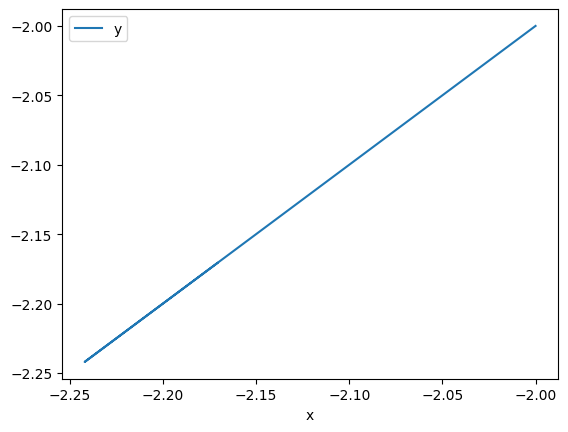

<Axes: >

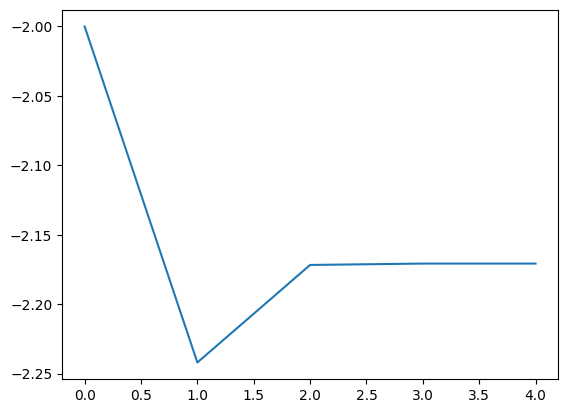

In [225]:
values["x"].plot()

<Axes: >

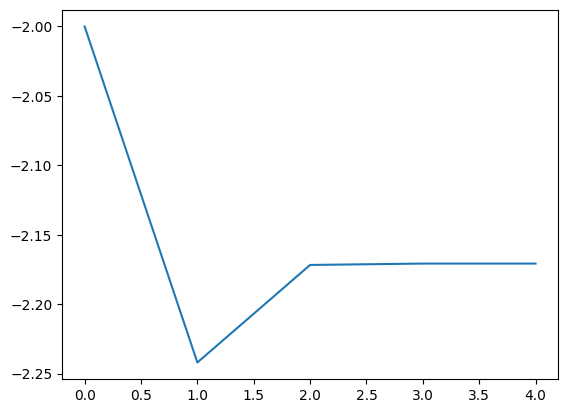

In [226]:
values["y"].plot()

In [188]:
print(f'x : {m} y: {n}')

x : -2.51768849119692 y: 0.623904159223635


In [178]:
!pip install plotly


In [227]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def f(x, y):
    return -np.sin(x * y) + np.cos(x - y)


x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


# Crear el gráfico 3D
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'surface'}]])
surface = go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')
fig.add_trace(surface)

# Agregar el gráfico interactivo de convergencia de x e y
scatter = go.Scatter3d(x=values['x'], y=values['y'], z=f(values['x'], values['y']),
                      mode='lines+markers', marker=dict(size=5), line=dict(color='red'))
fig.add_trace(scatter)

# Configurar el diseño del gráfico 3D
fig.update_layout(scene=dict(aspectmode='data'))
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='f(X, Y)'))
fig.update_layout(title_text='Gráfico 3D Interactivo de f(x, y) con Convergencia de Valores')
fig.show()


